# Test simple workflow implementation

### DotDict

In [1]:
import sys
sys.path.insert(0, '/Users/joerg/git_libs/pyiron_core')
sys.path

['/Users/joerg/git_libs/pyiron_core',
 '/Users/joerg/git_libs/pyiron_nodes',
 '/Users/joerg/git_libs/pyiron_workflow',
 '/Users/joerg/git_libs/ironflow',
 '/Users/joerg/git_libs/pyiron_core/notebooks',
 '/Users/joerg/miniforge3/envs/py12/lib/python312.zip',
 '/Users/joerg/miniforge3/envs/py12/lib/python3.12',
 '/Users/joerg/miniforge3/envs/py12/lib/python3.12/lib-dynload',
 '',
 '/Users/joerg/miniforge3/envs/py12/lib/python3.12/site-packages']

In [2]:
from pyiron_workflow.simple_workflow import DotDict

my_dict = DotDict(item_type=str)
my_dict.add_key("a", "abs")
my_dict.add_key("c", "abs")
my_dict["f"] = "gh"
del my_dict["a"]
my_dict.keys()
try:
    my_dict.d = 10
except TypeError as e:
    print("Error: ", e)
print(my_dict.keys())
print(my_dict["f"])

SyntaxError: '(' was never closed (simple_workflow.py, line 715)

### Analyze function

In [3]:
from pyiron_workflow.simple_workflow import (
    extract_output_parameters_from_function,
    extract_input_parameters_from_function,
    get_type_from_path,
    get_import_path_from_type,
)

In [4]:
def demo_fn(i1: int, i2: DotDict, i3: int = 5) -> tuple[int, DotDict, int]:
    a = i1 + 1
    b = 2
    return a, i2, i3 + 2  # This function returns a and b


print(demo_fn(2, i2=my_dict))
print(extract_output_parameters_from_function(demo_fn))  # Output: ('a', 'b')

(3, {'c': 'abs', 'f': 'gh'}, 7)
{'label': ['a', 'i2', None], 'type': ['builtins.int', 'pyiron_workflow.simple_workflow.DotDict', 'builtins.int']}


In [5]:
inp_info = extract_input_parameters_from_function(demo_fn)
inp_info

{'label': ['i1', 'i2', 'i3'],
 'type': ['builtins.int',
  'pyiron_workflow.simple_workflow.DotDict',
  'builtins.int'],
 'default': ['__empty', '__empty', 5]}

In [6]:
import json

json.dumps(inp_info)

'{"label": ["i1", "i2", "i3"], "type": ["builtins.int", "pyiron_workflow.simple_workflow.DotDict", "builtins.int"], "default": ["__empty", "__empty", 5]}'

### Construct Node

In [7]:
from pyiron_workflow.simple_workflow import Node, as_function_node

In [8]:
import numpy as np


@as_function_node
def linspace(x_min: int = 0, x_max: float = 2 * np.pi, n: int = 50):

    vec = np.linspace(x_min, x_max, n)
    return vec


@as_function_node
def sin(x):
    import numpy as np

    vec = np.sin(x)
    return vec


@as_function_node("plot")
def plot(x, y):
    import matplotlib.pylab as plt

    plt.plot(x, y)
    return plt.show()

In [9]:
l = linspace(x_min=2)
l.inputs.x_min

label                                                  x_min
type                                            builtins.int
default                                                    0
ready                                                   True
value                                                      2
node       <pyiron_workflow.simple_workflow.Node object a...
dtype: object

In [10]:
l.outputs

{'label': ['vec'], 'type': ['builtins.NoneType'], 'ready': [False], 'value': [None], 'node': [<pyiron_workflow.simple_workflow.Node object at 0x122845a30>]}

In [11]:
l.kwargs

{'x_min': 2, 'x_max': 6.283185307179586, 'n': 50}

In [12]:
l._func(**l.kwargs)

array([2.        , 2.08741195, 2.17482389, 2.26223584, 2.34964778,
       2.43705973, 2.52447167, 2.61188362, 2.69929556, 2.78670751,
       2.87411945, 2.9615314 , 3.04894334, 3.13635529, 3.22376723,
       3.31117918, 3.39859112, 3.48600307, 3.57341501, 3.66082696,
       3.7482389 , 3.83565085, 3.92306279, 4.01047474, 4.09788668,
       4.18529863, 4.27271057, 4.36012252, 4.44753446, 4.53494641,
       4.62235835, 4.7097703 , 4.79718224, 4.88459419, 4.97200613,
       5.05941808, 5.14683002, 5.23424197, 5.32165391, 5.40906586,
       5.4964778 , 5.58388975, 5.67130169, 5.75871364, 5.84612558,
       5.93353753, 6.02094947, 6.10836142, 6.19577336, 6.28318531])

In [13]:
l.run()

array([2.        , 2.08741195, 2.17482389, 2.26223584, 2.34964778,
       2.43705973, 2.52447167, 2.61188362, 2.69929556, 2.78670751,
       2.87411945, 2.9615314 , 3.04894334, 3.13635529, 3.22376723,
       3.31117918, 3.39859112, 3.48600307, 3.57341501, 3.66082696,
       3.7482389 , 3.83565085, 3.92306279, 4.01047474, 4.09788668,
       4.18529863, 4.27271057, 4.36012252, 4.44753446, 4.53494641,
       4.62235835, 4.7097703 , 4.79718224, 4.88459419, 4.97200613,
       5.05941808, 5.14683002, 5.23424197, 5.32165391, 5.40906586,
       5.4964778 , 5.58388975, 5.67130169, 5.75871364, 5.84612558,
       5.93353753, 6.02094947, 6.10836142, 6.19577336, 6.28318531])

In [14]:
l.outputs.vec.value

array([2.        , 2.08741195, 2.17482389, 2.26223584, 2.34964778,
       2.43705973, 2.52447167, 2.61188362, 2.69929556, 2.78670751,
       2.87411945, 2.9615314 , 3.04894334, 3.13635529, 3.22376723,
       3.31117918, 3.39859112, 3.48600307, 3.57341501, 3.66082696,
       3.7482389 , 3.83565085, 3.92306279, 4.01047474, 4.09788668,
       4.18529863, 4.27271057, 4.36012252, 4.44753446, 4.53494641,
       4.62235835, 4.7097703 , 4.79718224, 4.88459419, 4.97200613,
       5.05941808, 5.14683002, 5.23424197, 5.32165391, 5.40906586,
       5.4964778 , 5.58388975, 5.67130169, 5.75871364, 5.84612558,
       5.93353753, 6.02094947, 6.10836142, 6.19577336, 6.28318531])

### Workflow

In [15]:
from pyiron_workflow.simple_workflow import Workflow, Node, Port

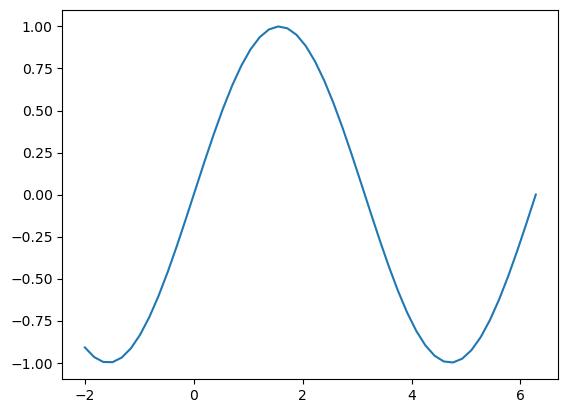

In [16]:
wf = Workflow("my_first_workflow")

wf.x = linspace(x_min=-2)
wf.sin = sin(x=wf.x)
wf.plot = plot(x=wf.x, y=wf.sin.outputs.vec)

wf.run()

In [17]:
wf._nodes

OrderedDict([('x', <pyiron_workflow.simple_workflow.Node at 0x105adb500>),
             ('sin', <pyiron_workflow.simple_workflow.Node at 0x105adb6b0>),
             ('plot', <pyiron_workflow.simple_workflow.Node at 0x1226e8da0>)])

In [18]:
wf._edges

[{'source': 'x',
  'source_handle': 'vec',
  'target': 'sin',
  'target_handle': 'x'},
 {'source': 'x',
  'source_handle': 'vec',
  'target': 'plot',
  'target_handle': 'x'},
 {'source': 'sin',
  'source_handle': 'vec',
  'target': 'plot',
  'target_handle': 'y'}]

Key idea: Provide generic functions to change between dict and object view

### Tests with a toy function

In [19]:
import logging

# logging.basicConfig(level=logging.DEBUG)


@as_function_node
def sin_test(x: float, y: int = 2):
    import numpy as np

    y = np.sin(x)
    z = y + 2
    return y, z

In [20]:
# node = Node(sin, output_labels=["sin"])
node = sin_test(x=0)

node.inputs.x = 9
node.inputs.x

label                                                      x
type                                          builtins.float
default                                              __empty
ready                                                   True
value                                                      9
node       <pyiron_workflow.simple_workflow.Node object a...
dtype: object

Make this idea/concept hierarchical for nested dictionaries, i.e. workflow -> nodes -> ports

key idea: central object is nested dict, represented by different views from the central object

In [21]:
out = node.run()
out

(0.4121184852417566, 2.4121184852417565)

In [22]:
node.outputs

{'label': ['y', 'z'], 'type': ['builtins.NoneType', 'builtins.NoneType'], 'ready': [True, True], 'value': [0.4121184852417566, 2.4121184852417565], 'node': [<pyiron_workflow.simple_workflow.Node object at 0x1328fa090>, <pyiron_workflow.simple_workflow.Node object at 0x1328fa090>]}

In [23]:
node.outputs.z

label                                                    z
type                                     builtins.NoneType
ready                                                 True
value                                             2.412118
node     <pyiron_workflow.simple_workflow.Node object a...
dtype: object

In [24]:
node.function

{'name': 'sin_test', 'import_path': '__main__.sin_test'}

In [25]:
@as_function_node
def body(x):
    y = x + 1
    return y


@as_function_node
def greater(x, x0=10):
    is_greater = x > x0
    return is_greater


def for_loop(body, i_max, i_min=0, break_condition=None):
    x = body.inputs.x.value
    for i in range(i_min, i_max):
        x = body(x)
        if break_condition is not None:
            if break_condition._func(x):  # run with updated x0
                print("break")
                break
    return x

In [26]:
for_loop(body(x=0), 20, break_condition=greater(x0=15))

break


11

In [27]:
greater(x0=20).inputs.x0

label                                                     x0
type                                       builtins.NoneType
default                                                   10
ready                                                   True
value                                                     20
node       <pyiron_workflow.simple_workflow.Node object a...
dtype: object

In [28]:
@as_function_node
def body(x):
    y = x + 1
    return y


@as_function_node
def greater(x, x0=10):
    is_greater = x > x0
    return is_greater


@as_function_node
def for_loop(body: Node, i_max, i_min=0, break_condition: Node = None):
    print(body)
    x = body.inputs.x.value
    for i in range(i_min, i_max):
        x = body(x)
        if break_condition is not None:
            if break_condition(x):
                print("break")
                break
    return x

Note:
+ only absolutely necessary input (all optional parameters are transported via the node instances!) 
- explicit assumption regarding name of first body argument ('x')
   -> maybe introduce get_first_argument()
   -> loosened condition to first argument  


In [29]:
loop_node = for_loop(body=body(x=0), i_max=20, break_condition=greater(x0=15))
loop_node.run()

break


16

In [30]:
loop_node = for_loop(body=body(x=0), i_max=20, break_condition=greater(x0=15))
loop_node(i_max=20)

break


16

### Improved syntax for recursive loop

In [31]:
@as_function_node
def recursive(x: int, x_0: int = 10) -> tuple[int, bool]:
    x_new = x + 1

    break_condition = False
    if x_new > x_0:
        break_condition = True
    return x_new, break_condition


@as_function_node
def loop_recursion(recursive_function: Node, max_steps=10):
    x = recursive_function.inputs.x.value
    for i in range(max_steps):
        x, break_condition = recursive_function(x)
        print(x, break_condition)

        if break_condition:
            break

    return x

In [32]:
recursive(1).run()

(2, False)

In [33]:
# rf = recursive_function=recursive(2)
loop = loop_recursion(recursive(1))
loop()

2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 True


11

In [34]:
@as_function_node
def increment_and_check(x: int, x_0: int = 10) -> tuple[int, bool]:
    """
    Increments the input value x and checks if it is greater than a threshold (x_0).

    Parameters:
    x: An integer to be incremented.
    x_0: A threshold for the break condition.

    Returns:
    tuple: The incremented value and a Boolean indicating if the incremented value has exceeded x_0.
    """
    x_new = x + 1
    stop_condition = x_new > x_0
    return x_new, stop_condition


@as_function_node
def perform_iterations(iteration_function: Node, max_steps: int = 10) -> int:
    """
    Performs a loop of iterations on a provided function, up to max_steps iterations. It stops early if the iteration function indicates to do so.

    Parameters:
    iteration_function: a Node object specifying the function to perform iterations on.
    max_steps: the maximum number of iterations to perform.

    Returns:
    int: the final value after performing the iterations.
    """
    x = (
        iteration_function.inputs.x.value
    )  # TODO: avoid assumption about variable name 'x'
    for _ in range(max_steps):
        x, stop_condition = iteration_function(x)
        print(x, stop_condition)

        if stop_condition:
            break

    return x

In [35]:
increment_and_check(x=1).inputs.data["label"]

['x', 'x_0']

In [36]:
perform_iterations(increment_and_check(x=1), max_steps=10).run()

2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 True


11

### Convert dataclass into node_function

In [37]:
from dataclasses import dataclass

In [38]:
from dataclasses import dataclass, fields


@dataclass
class TestData:
    a: int = 0
    b: str = "abc"


test_data = TestData(b="test")

for field in fields(TestData):
    name = field.name
    type_hint = field.type
    value = getattr(test_data, name)
    print(f"Name: {name}, Type: {type_hint}, Value: {value}")

Name: a, Type: <class 'int'>, Value: 0
Name: b, Type: <class 'str'>, Value: test


In [39]:
fields(test_data)

(Field(name='a',type=<class 'int'>,default=0,default_factory=<dataclasses._MISSING_TYPE object at 0x101e0c050>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=False,_field_type=_FIELD),
 Field(name='b',type=<class 'str'>,default='abc',default_factory=<dataclasses._MISSING_TYPE object at 0x101e0c050>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=False,_field_type=_FIELD))

In [40]:
from pyiron_workflow.simple_workflow import extract_dataclass_parameters

extract_dataclass_parameters(TestData())

{'label': ['a', 'b'], 'type': [int, str], 'default': [0, 'abc']}

In [41]:
def as_out_dataclass(**kwargs):
    dataclass = TestData(kwargs)
    return dataclass

In [42]:
as_out_dataclass(**extract_dataclass_parameters(test_data))

TestData(a={'label': ['a', 'b'], 'type': [<class 'int'>, <class 'str'>], 'default': [0, 'test']}, b='abc')

In [43]:
from pyiron_workflow.simple_workflow import as_out_dataclass_node, as_inp_dataclass_node


@as_inp_dataclass_node
class TestData:
    a: int = 0
    b: str = "abc"
    c: float = 10.9

In [44]:
td = TestData(b='d')
td._func(**td.kwargs)

TestData(a=0, b='d', c=10.9)

In [45]:
td.run()

TestData(a=0, b='d', c=10.9)

In [46]:
td(a=20, b='bc')

TestData(a=20, b='bc', c=10.9)

In [47]:
data = td.outputs.dataclass.value
data

TestData(a=20, b='bc', c=10.9)

In [48]:
@as_out_dataclass_node
class TestData:
    a: int = 0
    b: str = "abc"
    c: float = 10.9

In [49]:
td_out = TestData(dataclass=data)
td_out.inputs

{'label': ['dataclass'], 'type': [<function dataclass at 0x101de7600>], 'ready': [True], 'value': [TestData(a=20, b='bc', c=10.9)], 'node': [<pyiron_workflow.simple_workflow.Node object at 0x13293be30>]}

In [50]:
td_out.inputs.dataclass.value

TestData(a=20, b='bc', c=10.9)

In [51]:
td_out.run()

(20, 'bc', 10.9)

In [52]:
td_out.outputs

{'label': ['a', 'b', 'c'], 'type': [<class 'int'>, <class 'str'>, <class 'float'>], 'default': [0, 'abc', 10.9], 'ready': [True, True, True], 'value': [20, 'bc', 10.9], 'node': [<pyiron_workflow.simple_workflow.Node object at 0x13293be30>, <pyiron_workflow.simple_workflow.Node object at 0x13293be30>, <pyiron_workflow.simple_workflow.Node object at 0x13293be30>]}

In [53]:
from dataclasses import asdict
data = td.outputs.dataclass.value

list(asdict(data).values())

[20, 'bc', 10.9]

In [54]:
asdict(data)

{'a': 20, 'b': 'bc', 'c': 10.9}

In [55]:
def func(**kwargs):
    if len(kwargs.keys()) != 1:
        raise ValueError(
            "dataclass output node should contain only a single input variable"
        )
    value = list(kwargs.values())[0]
    return tuple(asdict(value).values())

In [56]:
func(dataclass=td.outputs.dataclass.value)

(20, 'bc', 10.9)